### Question2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Gauss1.dat'
df = pd.read_csv(url, skiprows=60, sep=' ',skipinitialspace=True, names=['y','x'])
df.head()

In [ ]:
U = np.array(df['x'])
y = np.array(df['y'])

In [ ]:
# model = linear_model.LinearRegression()
# model.fit(X,y)
# yhat = model(X)

In [ ]:
utr,uts,ytr,yts = train_test_split(U, y, test_size=0.5)

In [ ]:
def exponential_model(u,d):
    n = len(u)
    X = np.zeros((n,d+1))
    for j in range(d+1):
        X[:,j] = np.exp(-j*u/d)
    return X

In [ ]:
def br_exponential_model(u,d):
    dline = np.array(range(d+1))
    X = np.exp(-u[:,None]*dline[None,:]/d)
    return X

In [ ]:
dtest = np.array(range(1,11))
nd = len(dtest)
mse = np.zeros(nd)

for i,d in enumerate(dtest):
    Xtr = exponential_model(utr,d)
    Xts = exponential_model(uts,d)
    model = LinearRegression()
    model.fit(Xtr,ytr)
    yhat = model.predict(Xts)
    mse[i] = np.mean((yhat-yts)**2)

minIndex = np.argmin(mse)
print("Estimated model order= {0:d}".format(dtest[minIndex]))

In [ ]:
plt.plot(dtest,mse)

### Question4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# True model parameters
beta0 = np.array([1,2,-1])   # coefficients

# Independent data
nsamp = 10
xtr = np.random.uniform(0,1,nsamp)


In [3]:
ones = np.ones((nsamp,1))
Atr = np.hstack((ones,xtr[:,None]))
xtrSqr = xtr**2
A0tr = np.hstack((Atr,xtrSqr[:,None]))
beta0 = beta0[:,None]

In [4]:
betaHat = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(Atr.T,Atr)),Atr.T),A0tr),beta0)
betaHat

array([[1.3074409],
       [0.7923815]])

In [5]:
xts = np.linspace(0,3,10)
onesTs = np.ones((10,1))
Ats = np.hstack((onesTs,xts[:,None]))
yhat = np.dot(Ats,betaHat)
yhat

array([[1.3074409 ],
       [1.57156807],
       [1.83569524],
       [2.0998224 ],
       [2.36394957],
       [2.62807673],
       [2.8922039 ],
       [3.15633107],
       [3.42045823],
       [3.6845854 ]])

In [6]:
xtsSqr = xts**2
A0ts = np.hstack((Ats,xtsSqr[:,None]))
y0hat = np.dot(A0ts,beta0)
y0hat

array([[ 1.        ],
       [ 1.55555556],
       [ 1.88888889],
       [ 2.        ],
       [ 1.88888889],
       [ 1.55555556],
       [ 1.        ],
       [ 0.22222222],
       [-0.77777778],
       [-2.        ]])

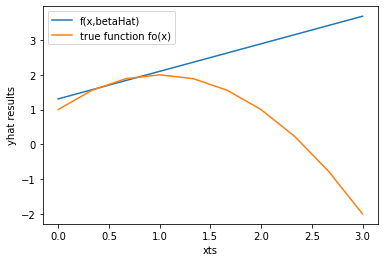

In [7]:
plt.plot(xts,yhat,label = 'f(x,betaHat)')
plt.plot(xts,y0hat, label = 'true function fo(x)')
plt.xlabel('xts')
plt.ylabel('yhat results')
plt.legend()

In [8]:
ImaxBiasSqr = np.argmax((y0hat-yhat)**2)
print('when x = '+str(xts[ImaxBiasSqr])+', the bias squared is the largest')

when x = 3.0, the bias squared is the largest


In [9]:
(y0hat-yhat)**2

array([[9.45199096e-02],
       [2.56400630e-04],
       [2.82956466e-03],
       [9.96451205e-03],
       [2.25682649e-01],
       [1.15030168e+00],
       [3.58043560e+00],
       [8.60899471e+00],
       [1.76251856e+01],
       [3.23145112e+01]])